In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

pd.set_option('max_column', 100)

In [5]:
raw_path = '../../dataset/raw/'
mst_path = '../../dataset/mst/'
fig_path = '../../export/01_summary_stats_ebike/'

In [6]:
os.listdir(mst_path)

['Participant_Survey.csv', 'question_lookup.csv']

In [7]:
#load in clean data
df = pd.read_csv(mst_path+"Participant_Survey.csv")
df.head()

,respondent_id,collector_id,start_date,end_date,ip_address,email_address,first_name,last_name,custom_data_1,"what_brand/type_of_e-bike_did_you_buy_(e.g.,_sonders_x)?",how_much_did_your_e-bike_cost_(before_the_rebate)?,"overall,_how_satisfied_are_you_with_your_e-bike?","why_do_you_like_or_dislike_your_e-bike?_what,_if_any,_other_thoughts_would_you_like_to_share_about_your_e-bike?",how_much_did_the_$700_rebate_influence_your_decision_to_purchase_an_e-bike?,how_far_is_your_average_trip_by_e-bike?,for_what_purpose_aremost_of_your_e-bike_rides?,business/work_use,injury_or_disability,sustainability_/_environmental_benefits,cargo_hauling,recreation_or_exercise,transport_children,save_money_/_reducetransportation_costs,hills,other_(please_specify),"social_media_(e.g.,_facebook,_instagram,_twitter)",news_article,bikesgv_listserve/email,friend/family/colleague,flyer,poster,other_(please_specify).1,how_familiar_were_you_with_e-bikes_before_hearing_about_this_rebate_program?,bicycle_(regular),electric_bicycle_(e-bike),working_motor_vehicle,scooter,motorcycle,none_of_the_above,walked,biked,skated_/_scooted,used_public_transit,carpooled_/_rode_as_a_passenger,used_ride_share_service_(lyft/uber),drove_car_/_motorcycle,walked.1,biked.1,skated_/_scooted.1,used_public_transit.1,carpooled_/_rode_as_a_passenger.1,used_ride_share_service_(lyft/uber).1,drove_car_/_motorcycle.1,how_oftendid_you_bicycle_for_any_purposebefore_purchasing_an_e-bike?,how_often_do_you_bicyclefor_any_purposesince_purchasing_an_e-bike?,do_you_use_your_e-bike_for_some_trips_that_you_used_to_take_by_car?,"have_youused_your_e-bikeon_a_river_path_or_‘greenway’_in_the_past_12_months?_(e.g.,_san_gabriel_river_or_rio_hondo_river_trails)",how_easy_or_difficult_is_it_to_bicycle_in_your_community?,did_your_level_of_comfort_riding_a_bicycle_in_traffic_increase_after_taking_the_city_cycling_class?,off-street_greenways_/_multi-use_paths,on-street_separated_/_physically_‘protected’_bikeways,buffered_bike_lanes,color_painted_bike_lanes,striped_bike_lanes,"bike_routes_(signage,_sharrows)",how_safe_doyou_feel_riding_a_bicycle_in_traffic?,"what_barriers_to_using_your_e-bike_have_you_encountered_thus_far,_if_any?",how_many_members_of_your_household_use_your_e-bike_at_least_once_a_month?,response,other_(please_specify).2,would_you_like_to_see_future_e-bike_rebate_programs?,should_future_programsexpand_the_list_of_eligible_light_electric_vehicles_to_include_electric-scooters_and_similar_micro-mobility_devices?,"other_suggestions,_feedback,_or_comments_forproject_organizers.",community_of_residence,zip_code,number_of_persons_in_household,household_income,what_is_your_age_group?,electric_car,electric_motorcycle,electric_scooter,electric_skateboard,electric_wheel,"no,_i_do_not_own_other_evs",other_(please_specify).3,american_indian_or_alaska_native,asian/pacific_islander,black_or_african_american,hispanic_or_latino,white,multi-ethnic,decline_to_state,other_(please_specify).4,female,male,decline_to_state.1,other
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Open-Ended Response,Response,Response,Open-Ended Response,Response,Response,Response,Business/Work Use,Injury or Disability,Sustainability / Environmental Benefits,Cargo Hauling,Recreation or Exercise,Transport children,Save money / reduce transportation costs,Hills,Other (please specify),"Social Media (e.g., Facebook, Instagram, Twitter)",News article,BikeSGV listserve/email,Friend/family/colleague,Flyer,Poster,Other (please specify),Response,Bicycle (regular),Electric Bicycle (E-bike),Working motor vehicle,Scooter,Motorcycle,None of the above,Walked,Biked,Skated / Scooted,Used public transit,Carpooled / rode as a passenger,Used ride share service (Lyft/Uber),Drove car / motorcycle,Walked,Biked,Skated / Scooted,Used public transit,Carpooled / rode as a passenger,Used ride share service (Lyft/Uber),Drove car / motorcycle,Response,Response,Response,Response,Response,Response,Off-street greenways / multi-use paths,On-street separated / physically ‘protecte

In [16]:
#convert column 12 & 13 to lists
satisfaction_response = df["overall,_how_satisfied_are_you_with_your_e-bike?"].tolist()[1:]
print(satisfaction_response)

satisfaction_comments = df["why_do_you_like_or_dislike_your_e-bike?_what,_if_any,_other_thoughts_would_you_like_to_share_about_your_e-bike?"].tolist()[1:]
print(satisfaction_comments)

['Extremely satisfied', 'Extremely satisfied', 'Somewhat satisfied', 'Extremely satisfied', 'Extremely\xa0dissatisfied', 'Somewhat satisfied', 'Extremely\xa0dissatisfied', 'Neither satisfied nor dissatisfied', 'Extremely satisfied', 'Somewhat satisfied', 'Extremely satisfied', 'Extremely satisfied', 'Extremely satisfied', 'Somewhat satisfied', 'Somewhat satisfied', 'Extremely satisfied', 'Extremely satisfied', 'Extremely satisfied', 'Somewhat satisfied', 'Extremely satisfied', 'Extremely satisfied', 'Somewhat satisfied', 'Extremely satisfied', 'Extremely satisfied', 'Somewhat satisfied', 'Extremely satisfied', 'Extremely satisfied', 'Somewhat satisfied', 'Extremely satisfied', 'Somewhat satisfied']
['My e-bike allows me to keep up with others and do hills easily.', 'It’s enabled my wife and I to have just one car (gave our other car to our daughter). My wife uses it to commute, I work at home).Salesperdon', 'My particular e-bike is an assist model only.  Which is fine, you could theore

In [35]:
#grouping the comments into different lists depending on the response

#lists of indices
exsat_i = [i for i, j in enumerate(satisfaction_response) if j == 'Extremely satisfied']
somsat_i = [i for i, j in enumerate(satisfaction_response) if j == 'Somewhat satisfied']
exdis_i = [i for i, j in enumerate(satisfaction_response) if j == 'Extremely\xa0dissatisfied']
neu_i = [i for i, j in enumerate(satisfaction_response) if j == 'Neither satisfied nor dissatisfied']

#print(exsat_i)
#print(somsat_i)
#print(exdis_i)
#print(neu_i)

#grouping the comments 

exsat_comments = []
somsat_comments = []
exdis_comments = []
neu_comments = []

for i in exsat_i:
    exsat_comments.append(satisfaction_comments[i])

for i in somsat_i:
    somsat_comments.append(satisfaction_comments[i])
    
for i in exdis_i:
    exdis_comments.append(satisfaction_comments[i])

for i in neu_i:
    neu_comments.append(satisfaction_comments[i])
    
print(exsat_comments)
#print(somsat_comments)
#print(exdis_comments)
#print(neu_comments)

['My particular e-bike is an assist model only.  Which is fine, you could theoretically put it in a low gear and pretend to pedal and it would scoot you along.  Wish it had a trigger throttle though.  The model is also a lot heavier, but all E-Bikes are heavy.  I also wish it had more gear selections, but it was one of the "few" that were in stock at the time I was shopping for one.  I had other choices in mind, but were out-of-stock throughout the time limit I had available to me.', 'The tires are too thick.', "The frame is a large frame with no option for a medium. Shorter people will have issue with straddling it, like I do. The 2nd thing I noticed is there doesn't feel any difference between each of the power settings. I contacted the company and they said you would notice it on hills. I still don't feel any difference, only one power setting. I have ridden other e-bikes and can definitely feel the difference when going through each of the power assist levels.", nan, 'The E-bike is

In [28]:
#import nltk
#nltk.download()

In [52]:
#tokenizing the lists of strings

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+') #remove punctuations

exsat_comments_tok = []
somsat_comments_tok = []
exdis_comments_tok = []
neu_comments_tok = []

for comment in exsat_comments:
    comment_tok = tokenizer.tokenize(comment)
    for word in comment_tok:
        exsat_comments_tok.append(word)
        
for comment in somsat_comments:
    if pd.isnull(comment): #skip over instance where the list is empty; there is no comment
        continue
    else:
        #print(comment)
        comment_tok = tokenizer.tokenize(comment)
        #print(comment_tok)
        for word in comment_tok:
            somsat_comments_tok.append(word)

for comment in exdis_comments:
    if pd.isnull(comment): 
        continue
    else:
        #print(comment)
        comment_tok = tokenizer.tokenize(comment)
        #print(comment_tok)
        for word in comment_tok:
            exdis_comments_tok.append(word)

for comment in neu_comments:
    if pd.isnull(comment):
        continue
    else:
        #print(comment)
        comment_tok = tokenizer.tokenize(comment)
        #print(comment_tok)
        for word in comment_tok:
            neu_comments_tok.append(word)    

print(neu_comments_tok)

['My', 'e', 'bike', 'allows', 'me', 'to', 'keep', 'up', 'with', 'others', 'and', 'do', 'hills', 'easily', 'It', 's', 'enabled', 'my', 'wife', 'and', 'I', 'to', 'have', 'just', 'one', 'car', 'gave', 'our', 'other', 'car', 'to', 'our', 'daughter', 'My', 'wife', 'uses', 'it', 'to', 'commute', 'I', 'work', 'at', 'home', 'Salesperdon', 'Heavy', 'tires', 'seem', 'fragile', 'I', 'can', 'travel', 'more', 'than', '20', 'miles', 'and', 'it', 's', 'folding', 'ebike', 'so', 'it', 's', 'easier', 'to', 'carry', 'to', 'gold', 'line', 'The', 'cadence', 'sensor', 'only', 'has', '6', 'magnets', 'so', 'it', 's', 'not', 'as', 'smooth', 'as', 'more', 'expensive', 'model', 'love', 'riding', 'the', 'bike', 'it', 'shifts', 'well', 'and', 'makes', 'it', 'easy', 'to', 'get', 'extra', 'exercise', 'Only', 'concern', 'I', 'have', 'is', 'when', 'I', 'have', 'to', 'lock', 'the', 'bike', 'up', 'outside', 'when', 'I', 'm', 'inside', 'for', 'a', 'while', 'I', 'm', 'concerned', 'that', 'it', 'will', 'be', 'stolen', 'bec

exsat_comments {'positive': 30, 'neutral': 381, 'negative': 4}


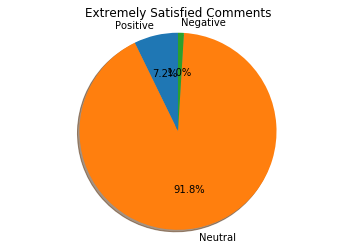

somsat_comments {'positive': 12, 'neutral': 347, 'negative': 10}


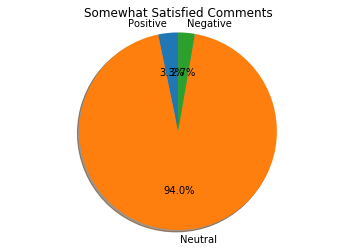

exdis_comments {'positive': 11, 'neutral': 310, 'negative': 3}


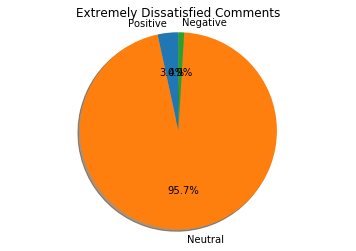

neu_comments {'positive': 0, 'neutral': 2, 'negative': 1}


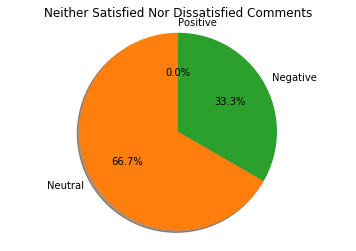

In [108]:
#sentiment analysis

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

sen = ['good','bad','awesome']

summary_exsat = {"positive":0,"neutral":0,"negative":0}

for word in exsat_comments_tok: 
    ss = sid.polarity_scores(word)
    
    if ss["compound"] == 0.0: 
        summary_exsat["neutral"] +=1
    elif ss["compound"] > 0.0:
        summary_exsat["positive"] +=1
    else:
        summary_exsat["negative"] +=1
        
print('exsat_comments',summary_exsat)

#find percentages of positivity, neutral and negativity

total_word_exsat = len(exsat_comments_tok)
pos_per_exsat = (summary_exsat['positive']/total_word_exsat)*100
neu_per_exsat = (summary_exsat['neutral']/total_word_exsat)*100
neg_per_exsat = (summary_exsat['negative']/total_word_exsat)*100

labels = 'Positive', 'Neutral', 'Negative'
sizes = [pos_per_exsat, neu_per_exsat, neg_per_exsat]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Extremely Satisfied Comments')

plt.show()


summary_somsat = {"positive":0,"neutral":0,"negative":0}

for word in somsat_comments_tok: 
    ss = sid.polarity_scores(word)
    
    if ss["compound"] == 0.0: 
        summary_somsat["neutral"] +=1
    elif ss["compound"] > 0.0:
        summary_somsat["positive"] +=1
    else:
        summary_somsat["negative"] +=1
        
print('somsat_comments',summary_somsat)

#find percentages of positivity, neutral and negativity

total_word_somsat = len(somsat_comments_tok)
pos_per_somsat = (summary_somsat['positive']/total_word_somsat)*100
neu_per_somsat = (summary_somsat['neutral']/total_word_somsat)*100
neg_per_somsat = (summary_somsat['negative']/total_word_somsat)*100

labels = 'Positive', 'Neutral', 'Negative'
sizes = [pos_per_somsat, neu_per_somsat, neg_per_somsat]

fig2, ax2 = plt.subplots()
ax2.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Somewhat Satisfied Comments')

plt.show()


summary_exdis = {"positive":0,"neutral":0,"negative":0}

for word in exdis_comments_tok: 
    ss = sid.polarity_scores(word)
    
    if ss["compound"] == 0.0: 
        summary_exdis["neutral"] +=1
    elif ss["compound"] > 0.0:
        summary_exdis["positive"] +=1
    else:
        summary_exdis["negative"] +=1
        
print('exdis_comments',summary_exdis)

#find percentages of positivity, neutral and negativity

labels = 'Positive', 'Neutral', 'Negative'
sizes = [summary_exdis['positive'], summary_exdis['neutral'], summary_exdis['negative']]

fig3, ax3 = plt.subplots()
ax3.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Extremely Dissatisfied Comments')

plt.show()


summary_neu = {"positive":0,"neutral":0,"negative":0}

for word in neu_comments_tok: 
    ss = sid.polarity_scores(word)
    
    if ss["compound"] == 0.0: 
        summary_neu["neutral"] +=1
    elif ss["compound"] > 0.0:
        summary_neu["positive"] +=1
    else:
        summary_neu["negative"] +=1
        
print('neu_comments',summary_neu)

#find percentages of positivity, neutral and negativity

labels = 'Positive', 'Neutral', 'Negative'
sizes = [summary_neu['positive'], summary_neu['neutral'], summary_neu['negative']]

fig4, ax4 = plt.subplots()
ax4.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax4.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Neither Satisfied Nor Dissatisfied Comments')

plt.show()

In [96]:
#word frequency and distribution

from nltk import *

fdist_exsat = FreqDist(exsat_comments_tok)
#print('exsat',fdist_exsat.most_common(10))

fdist_somsat = FreqDist(somsat_comments_tok)
print('somsat',fdist_somsat.most_common(10))

fdist_exdis = FreqDist(exdis_comments_tok)
print('exdis',fdist_exdis.most_common(10))

fdist_neu = FreqDist(neu_comments_tok)
print('neu',fdist_neu.most_common(10))

somsat [('the', 15), ('to', 12), ('I', 12), ('it', 10), ('and', 10), ('is', 8), ('a', 8), ('would', 6), ('of', 6), ('bike', 5)]
exdis [('the', 19), ('to', 16), ('I', 15), ('a', 11), ('bike', 7), ('it', 6), ('on', 6), ('and', 6), ('that', 6), ('had', 5)]
neu [('No', 1), ('throttle', 1), ('heavy', 1)]


[('Extremely satisfied', 17), ('Somewhat satisfied', 10), ('Extremely\xa0dissatisfied', 2), ('Neither satisfied nor dissatisfied', 1)]


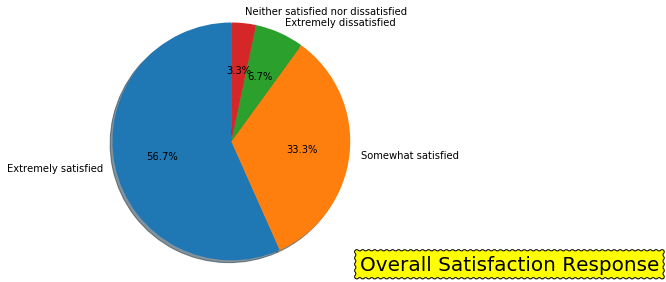

In [109]:
#pie plot of the distribution of satisfaction responses

from collections import defaultdict
from collections import Counter

#count the number of different responses
response_count = Counter(satisfaction_response).most_common()
print(response_count)

responses = []
counts = []

for response in response_count:
    responses.append(response[0])
    counts.append(response[1])

labels = responses
values = counts

fig5, ax5 = plt.subplots()
ax5.pie(values, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

ax5.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
    
# customizing the box around the title
bbox_props = dict(boxstyle='roundtooth', fc='yellow')

# the title
plt.text(1.08, -1.08, 'Overall Satisfaction Response', fontsize=20, bbox=bbox_props)

plt.show()
